1) From Scratch

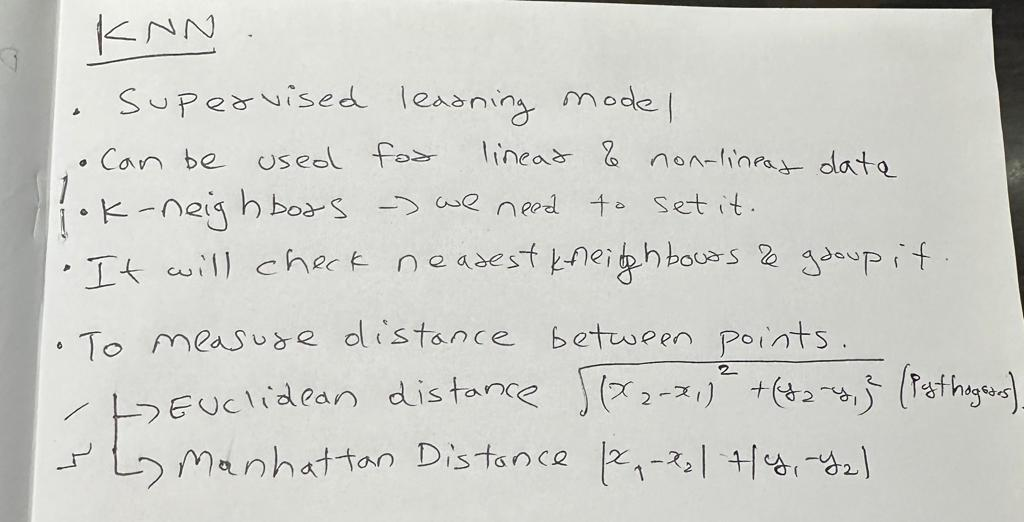

In [68]:
import pandas as pd
import numpy as np

In [70]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/machine_learning/datasets/diabetes.csv')

# Extract features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [71]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [74]:
colnames_numeric = data.columns[0:6]

In [75]:
#Scaling a data in always a good idea while using KNN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[colnames_numeric] = scaler.fit_transform(data[colnames_numeric])

In [76]:
#Breaking the data into training and test set
import random
def train_test_split(data, split, trainingSet = [], testSet = []):
    for x in range(len(data)):
        if random.random() < split:
            trainingSet.append(data[x])
        else:
            testSet.append(data[x])

In [78]:
df = data.values.tolist()

In [79]:
trainingSet = []
testSet = []
split = 0.66
train_test_split(df, split, trainingSet, testSet)

In [83]:
len(trainingSet)

504

In [84]:
len(testSet)

264

In [85]:
#Define Euclidean distances
import math
def Euclideandist(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)

In [86]:
#Getting the K neighbours having the closest Euclidean distance to the test instance
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = Euclideandist(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [87]:
#After sorting the neighbours based on their respective classes, max voting to give the final class of the test instance
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)#Sorting it based on votes
	return sortedVotes[0][0]

In [88]:
#Getting the accuracy
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [90]:
	# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=0.0, act

In [91]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 70.07575757575758%


2) Using SCIKIT

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/machine_learning/datasets/diabetes.csv')

# Extract features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test)

# Display predictions and actual values
predictions_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(predictions_df.head(10))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


     Predicted  Actual
668          0       0
324          0       0
624          0       0
690          0       0
473          1       0
204          0       0
97           0       0
336          1       0
568          1       0
148          0       0
Accuracy: 0.7047244094488189
